https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

https://chatgpt.com/share/68336d34-11e4-8011-b2bf-9928639d3cb2

## Este colab tem como objetivo estudar o comportamento da base do tesouro direto

## Desafio
### Desenvolver solução baseada em dados para identificar perfis de investidores para o produto <b>tesouro direto<b>

In [1]:
# pip install scikit-learn
# !pip install pyarrow
# !pip install seaborn


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

In [3]:
dados_tesouro = pd.read_parquet("nfce_autorizada.parquet")

In [4]:
# dados_tesouro

In [5]:
# dados_tesouro.Profissao.values

In [6]:
dados_tesouro['Situacao da Conta'].unique()

array(['D', 'A'], dtype=object)

In [7]:
min_val_idade = dados_tesouro.Idade.min()
max_val_idade = dados_tesouro.Idade.max()
ind_max_val_idade = dados_tesouro.Idade.idxmax()
print("Valor minimo de idade: ", min_val_idade)
print("Valor maximo de idade: ", max_val_idade)
print("Index do valor maximo de idade: ", ind_max_val_idade)

Valor minimo de idade:  0
Valor maximo de idade:  118
Index do valor maximo de idade:  553788


In [8]:
# dados_tesouro.loc[dados_tesouro['Idade'].idxmax()]
# dados_tesouro.loc[dados_tesouro['Idade'].idxmin()]
# len(dados_tesouro)
# dados_tesouro.describe()
# dados_tesouro['Profissao'].value_counts().describe()
# dados_tesouro.info()

# 1. Pré-processamento dos dados

## 1.1 Converter varaiveis categoricas em numericas, usando One-Hot Encoding ou Label Enconding
Ex.: Profissao, Estado Civil, Genero

In [9]:
len(dados_tesouro['UF do Investidor'].unique())

27

In [ ]:
# # dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
# dados_tesouro_encoded = dados_tesouro.copy()
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Profissao', 'Estado Civil'])
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero'])
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'UF do Investidor','Cidade do Investidor', 'Pais do Investidor'])

In [14]:
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
dados_tesouro_encoded = dados_tesouro.copy()
dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero', 'Pais do Investidor', 'UF do Investidor', 'Profissao', 'Estado Civil'])
dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'Cidade do Investidor'])

In [15]:
dados_tesouro_encoded

,Idade,Situacao da Conta,Operou 12 Meses,Genero_F,Genero_M,Genero_N,Pais do Investidor_BRASIL,UF do Investidor_AC,UF do Investidor_AL,UF do Investidor_AM,...,Estado Civil_Casado(a) com brasileiro(a) nato(a),Estado Civil_Casado(a) com brasileiro(a) naturalizado(a),Estado Civil_Casado(a) com estrangeiro(a),Estado Civil_Desquitado(a),Estado Civil_Divorciado(a),Estado Civil_Não se aplica,Estado Civil_Separado judic.,Estado Civil_Solteiro(a),Estado Civil_União estável,Estado Civil_Viúvo(a)
0,57,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,41,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,42,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,43,D,N,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,73,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,43,D,N,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1048571,34,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1048572,27,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1048573,38,D,N,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## 1.2 Normalizar vaiveis numericas como Idade

In [16]:
dados_tesouro['Situacao da Conta'].unique()
dados_tesouro['Operou 12 Meses'].unique()

array(['N', 'S'], dtype=object)

In [17]:
scaler = MinMaxScaler()

dados_tesouro_encoded['Idade'] = scaler.fit_transform(dados_tesouro[['Idade']])
dados_tesouro_encoded = dados_tesouro_encoded.rename(columns={'Idade': 'Idade_normalizada'})

## 1.3 Converter "Operou 12 Meses" e "Situacao" da Conta para booleanos.

In [18]:
dados_tesouro_encoded['Operou 12 Meses'] = dados_tesouro['Operou 12 Meses'].map({'S': True, 'N': False})
dados_tesouro_encoded['Situacao da Conta'] = dados_tesouro['Situacao da Conta'].map({'A': True, 'D': False})

# dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']] = dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']].astype(float)

dados_tesouro_encoded = dados_tesouro_encoded.astype(float)


In [19]:
dados_tesouro_encoded

,Idade_normalizada,Situacao da Conta,Operou 12 Meses,Genero_F,Genero_M,Genero_N,Pais do Investidor_BRASIL,UF do Investidor_AC,UF do Investidor_AL,UF do Investidor_AM,...,Estado Civil_Casado(a) com brasileiro(a) nato(a),Estado Civil_Casado(a) com brasileiro(a) naturalizado(a),Estado Civil_Casado(a) com estrangeiro(a),Estado Civil_Desquitado(a),Estado Civil_Divorciado(a),Estado Civil_Não se aplica,Estado Civil_Separado judic.,Estado Civil_Solteiro(a),Estado Civil_União estável,Estado Civil_Viúvo(a)
0,0.483051,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347458,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.355932,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.364407,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.618644,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.364407,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1048571,0.288136,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1048572,0.228814,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1048573,0.322034,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dados_tesouro_encoded.Idade_normalizada.iloc[553788]

np.float64(1.0)

## Analisar apenas um sample

In [21]:
from sklearn.metrics import pairwise_distances

# del dados_tesouro
df_features = dados_tesouro_encoded.copy().sample(n=100000, random_state=42)
del dados_tesouro_encoded
del dados_tesouro
import gc
gc.collect()


0

In [22]:
import psutil
process = psutil.Process()
print(f"Memória usada: {process.memory_info().rss / 1024 ** 2:.2f} MB")

mem = psutil.virtual_memory()
print(f"Memória total: {mem.total / 1024 ** 2:.2f} MB")
print(f"Memória disponível: {mem.available / 1024 ** 2:.2f} MB")
print(f"Uso de memória: {mem.percent:.2f}%")


Memória usada: 2575.89 MB
Memória total: 515788.58 MB
Memória disponível: 313712.48 MB
Uso de memória: 39.20%


# Tecnicas de clusterizacao

In [118]:
# Calcula a matriz de distância de Hamming
matriz_dist_hamming = pairwise_distances(df_features, metric='hamming')

print(matriz_dist_hamming)

[[0.         0.33333333 0.66666667 ... 0.16666667 0.16666667 0.16666667]
 [0.33333333 0.         0.33333333 ... 0.5        0.5        0.5       ]
 [0.66666667 0.33333333 0.         ... 0.66666667 0.66666667 0.66666667]
 ...
 [0.16666667 0.5        0.66666667 ... 0.         0.16666667 0.16666667]
 [0.16666667 0.5        0.66666667 ... 0.16666667 0.         0.16666667]
 [0.16666667 0.5        0.66666667 ... 0.16666667 0.16666667 0.        ]]


In [119]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# # 3. Plotar heatmap
# sns.heatmap(matriz_dist_hamming, annot=True, cmap='viridis', xticklabels=df_features.index, yticklabels=df_features.index)
# plt.title('Matriz de Distância (Hamming)')
# plt.xlabel('Cliente')
# plt.ylabel('Cliente')
# plt.show()

# 4. Clustering (ex: Agglomerative Clustering com 8 grupos)
clustering = AgglomerativeClustering(n_clusters=6, metric='precomputed', linkage='average')
labels = clustering.fit_predict(matriz_dist_hamming)

In [120]:
# Mostrar os grupos
df_features['Cluster'] = labels

## Teste 1: Redução de Dimensionalidade (com PCA ou t-SNE)

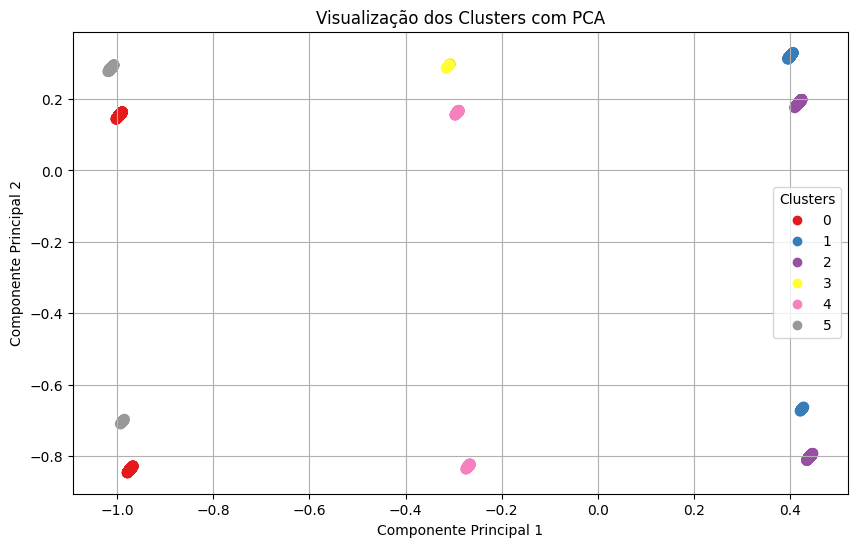

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz os dados para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features.drop('Cluster', axis=1))

# Plota os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_features['Cluster'], cmap='Set1', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


## Teste 2: Usar t-SNE para representação mais precisa (mais lento, mas melhor visual)

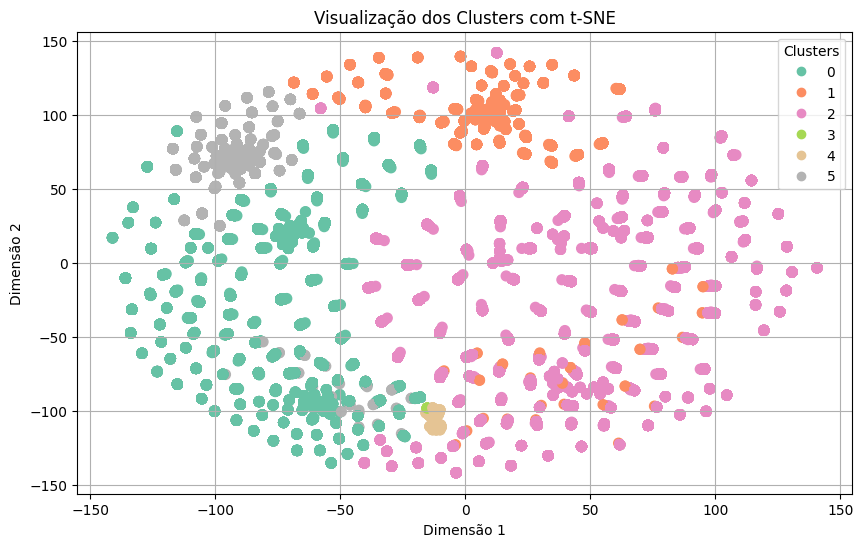

In [122]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_features.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_features['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


## Teste 3 Clusterização KMEANS (Unsupervised Learning)

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

NUMBER_CLUSTERS = 6

In [124]:
test = df_features.drop('Cluster', axis=1)

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

# clusterização
kmeans = KMeans(n_clusters=NUMBER_CLUSTERS, random_state=42)
test['cluster'] = kmeans.fit_predict(X_scaled)

### Redução de dimensionalidade para facilitar a visualização

In [125]:
# análise
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

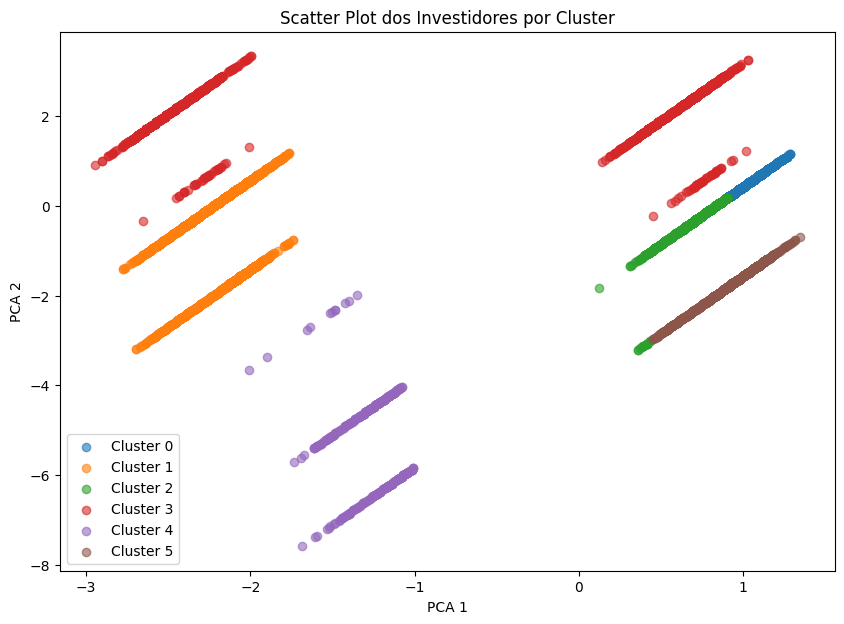

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plotando cada cluster com uma cor diferente
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        X_pca[test['cluster'] == cluster, 0],
        X_pca[test['cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot dos Investidores por Cluster')
plt.legend()
plt.show()


## Teste 4 - Analise utilizando MiniBatchKMeans e DBSCAN

In [131]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

# Passo 1: Converter os dados booleanos para float
df_prepared = df_features.astype(float)

# Passo 2: Aplicar MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=6, batch_size=100000, random_state=42)
labels = kmeans.fit_predict(df_prepared)

# Passo 3: Adicionar os rótulos de cluster ao DataFrame
df_prepared['Cluster'] = labels

# Exibir os primeiros resultados
print(df_prepared['Cluster'].value_counts())


Cluster
0    51786
1    22044
3    13730
5     5202
4     4402
2     2836
Name: count, dtype: int64


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Amostragem para evitar estouro de memória
df_amostra = df_features.sample(n=100000, random_state=42).astype(float)

# Escalonamento (DBSCAN se beneficia disso)
df_scaled = StandardScaler().fit_transform(df_amostra)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

# Adiciona os rótulos
df_amostra['Cluster'] = labels

# Mostra distribuição
print(df_amostra['Cluster'].value_counts())


Cluster
-1       29159
 11       3032
 28       1425
 0        1328
 4        1087
         ...  
 2120        3
 2266        3
 1982        3
 2398        3
 2215        3
Name: count, Length: 2421, dtype: int64


In [ ]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_amostra.drop('Cluster', axis=1))



NameError: name 'plt' is not defined

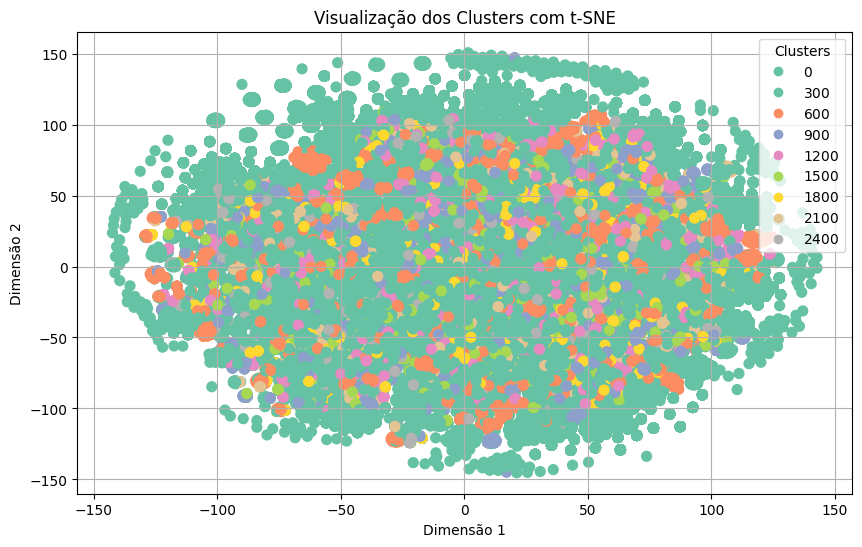

In [26]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_amostra['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()